In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
from sklearn.metrics import accuracy_score

import cufflinks as cf

In [351]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [355]:
df=pd.read_csv(r'C:\Users\Tushar Jain\Desktop\projects\heart.csv')

In [358]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [361]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [367]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [376]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [382]:
#Visualisation

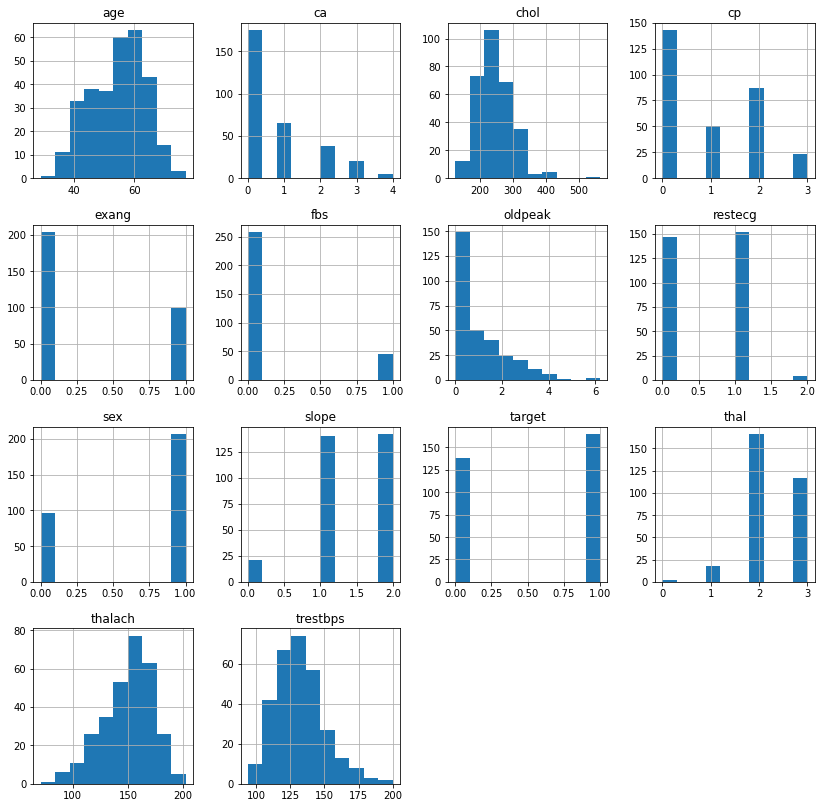

In [385]:
df.hist(figsize=(14,14)) #pandas builtin (runs on top of matplotlib)
plt.show()

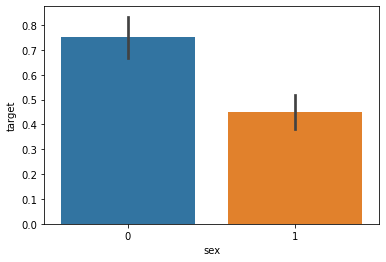

In [391]:
sns.barplot(df['sex'],df['target'])
plt.show()

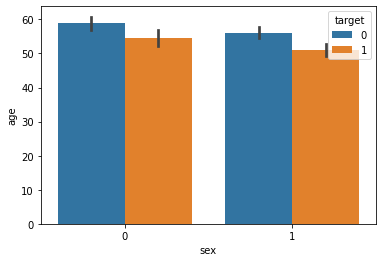

In [394]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

In [396]:
#plotly express

In [398]:
px.bar(df,df['sex'],df['target'])

In [400]:
#heatmap

In [401]:
numeric_colums=['trestbps','chol','age','oldpeak','thalach']

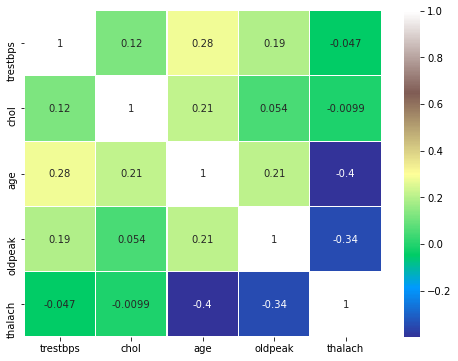

In [402]:
sns.heatmap(df[numeric_colums].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [403]:
#displots

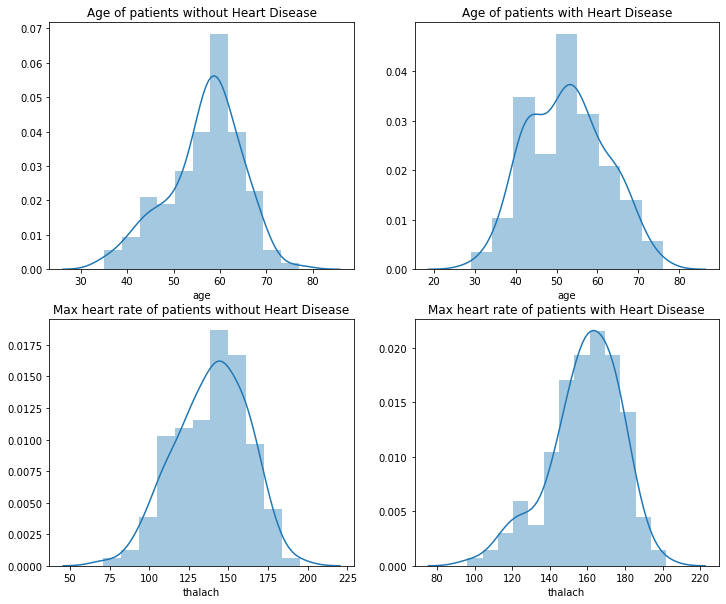

In [404]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without Heart Disease')

plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with Heart Disease')

plt.subplot(223)
sns.distplot(df[df['target']==0].thalach)
plt.title('Max heart rate of patients without Heart Disease')

plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title('Max heart rate of patients with Heart Disease')
plt.show()

In [405]:
#DATA PROCESSING

In [406]:
x,y=df.loc[:,:'thal'],df['target']

In [411]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [412]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.3,shuffle=True)

In [413]:
print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [414]:
#DECISION TREE CALSSIFIER

In [415]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [416]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2


In [417]:
prediction=dt.predict(x_test)

In [418]:
prediction

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [419]:
y_test

99     1
296    0
89     1
30     1
234    0
      ..
20     1
28     1
131    1
172    0
71     1
Name: target, Length: 91, dtype: int64

In [420]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [421]:
accuracy_dt

87.91208791208791

In [422]:
#feature importance

In [423]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.09929115 0.07297536 0.27246581 0.07026723 0.04285788 0.
 0.02609082 0.05913863 0.0296952  0.07420233 0.0367127  0.12636928
 0.08993359]


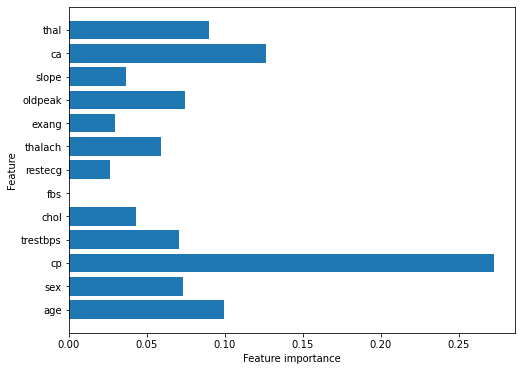

In [424]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances(dt)
plt.savefig('feature_importance')

In [425]:
#KNN ALGORITHM

In [427]:
sc=StandardScaler().fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [445]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=16)

In [446]:
prediction_knn=knn.predict(x_test_std)

In [447]:
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [448]:
accuracy_knn

89.01098901098901

In [449]:
print("Accuracy on training set: {:.3f}".format(knn.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))

Accuracy on training set: 0.514
Accuracy on test set: 0.484


In [450]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train)
    prediction_knn=knn.predict(x_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [451]:
scores

{1: 0.7912087912087912,
 2: 0.8241758241758241,
 3: 0.8351648351648352,
 4: 0.8131868131868132,
 5: 0.8241758241758241,
 6: 0.8351648351648352,
 7: 0.8791208791208791,
 8: 0.8571428571428571,
 9: 0.8571428571428571,
 10: 0.8571428571428571,
 11: 0.8571428571428571,
 12: 0.8791208791208791,
 13: 0.8571428571428571,
 14: 0.8681318681318682,
 15: 0.8571428571428571,
 16: 0.8901098901098901,
 17: 0.8461538461538461,
 18: 0.8791208791208791,
 19: 0.8681318681318682,
 20: 0.8791208791208791,
 21: 0.8791208791208791,
 22: 0.8901098901098901,
 23: 0.8681318681318682,
 24: 0.8791208791208791,
 25: 0.8791208791208791}

In [452]:
px.line(x=k_range,y=scores_list)

In [453]:
x_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
x_knn_std=sc.transform(x_knn)
x_knn_prediction=dt.predict(x_knn)

In [454]:
(X_knn_prediction[0])

1

In [455]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

In [457]:
sns.set(rc={'figure.figsize':(15,7)})
px.bar(x=algorithms,y=scores)
